In [38]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np



%matplotlib inline
mlp.rcParams['figure.figsize'] = (16,10)
pd.set_option('display.max_rows', 500)

import plotly.graph_objects as go

# Data load

In [39]:
# We can start with parsing the dates at the beginning so that it is the correct format

df_analyse = pd.read_csv('../data/processed/COVID_small_sync_timeline_table.csv', sep = ';')

df_analyse.sort_values('date', ascending = True).head()

,doubling every 25 days,doubling every 35 days,doubling every 45 days,Italy,US,Spain,Germany,India,date
0,100.000000,100.000000,100.000000,155.0,107.0,120.0,117.0,102.0,0
1,102.811383,102.000161,101.552251,229.0,184.0,165.0,150.0,113.0,1
2,105.701804,104.040328,103.128597,322.0,237.0,222.0,188.0,119.0,2
3,108.673486,106.121302,104.729412,453.0,403.0,259.0,240.0,142.0,3
4,111.728714,108.243899,106.355076,655.0,519.0,400.0,349.0,156.0,4


In [41]:
country_list = df_analyse.columns[1:]
country_list

Index(['doubling every 35 days', 'doubling every 45 days', 'Italy', 'US',
       'Spain', 'Germany', 'India', 'date'],
      dtype='object')

# Helper Functions

In [42]:
def quick_plot(x_in, df_input, y_scale= 'log', slider = False):
    
    fig= go.Figure()
    
    for each in df_input.columns:
        fig.add_trace(go.Scatter(
                        x=x_in,
                        y=df_input[each],
                        name= each,
                        opacity= 0.8))
    
    fig.update_layout(autosize=True,
        width = 1024,
        height= 768,
        font=dict(
            family="PT Sans, monospace",
            size= 18,
            color= "#7f7f7f"
            )
        )
    
    fig.update_yaxes(type=y_scale),
    fig.update_xaxes(tickangle = -45,
                    nticks= 20,
                    tickfont = dict(size=14, color = "#7f7f7f")
                    )
    if slider == True:
        fig.update_layout(xaxis_rangeslider_visible = True)
    fig.show()

In [43]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [45]:
quick_plot(df_analyse.date,
          df_analyse.iloc[:,3:-1],
          y_scale= 'log',
          slider = True)

# Fitting a Polynomial Curve

In [85]:
# First we will check whether we have all the data present or not

df_poly_check = df_analyse.iloc[0:150, 3:-1].reset_index()
df_poly_check

,index,Italy,US,Spain,Germany,India
0,0,155.0,107.0,120.0,117.0,102.0
1,1,229.0,184.0,165.0,150.0,113.0
2,2,322.0,237.0,222.0,188.0,119.0
3,3,453.0,403.0,259.0,240.0,142.0
4,4,655.0,519.0,400.0,349.0,156.0
5,5,888.0,594.0,500.0,534.0,194.0
6,6,1128.0,782.0,673.0,684.0,244.0
7,7,1694.0,1147.0,1073.0,847.0,330.0
8,8,2036.0,1586.0,1695.0,1112.0,396.0
9,9,2502.0,2219.0,2277.0,1296.0,499.0


In [88]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

In [95]:
y = df_poly_check[['Germany', 'Italy', 'US', 'Spain']].unstack().sort_index(axis = 0, level = 1)

In [96]:
y.head()

Germany  0    117.0
Italy    0    155.0
Spain    0    120.0
US       0    107.0
Germany  1    150.0
dtype: float64

In [97]:
test_points = 150
y_train = y[0:-test_points-1]
y_test = y[-test_points:]

In [98]:
X_train = np.arange(len(y_train)).reshape(-1,1)/4.0
X_test = np.arange(len(y_train), len(y_train) + test_points).reshape(-1, 1)/4.0

In [99]:
%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn;
seaborn.set(rc = {'figure.figsize':(16,8)})      #Plot formatting i.e. preparing for subplot

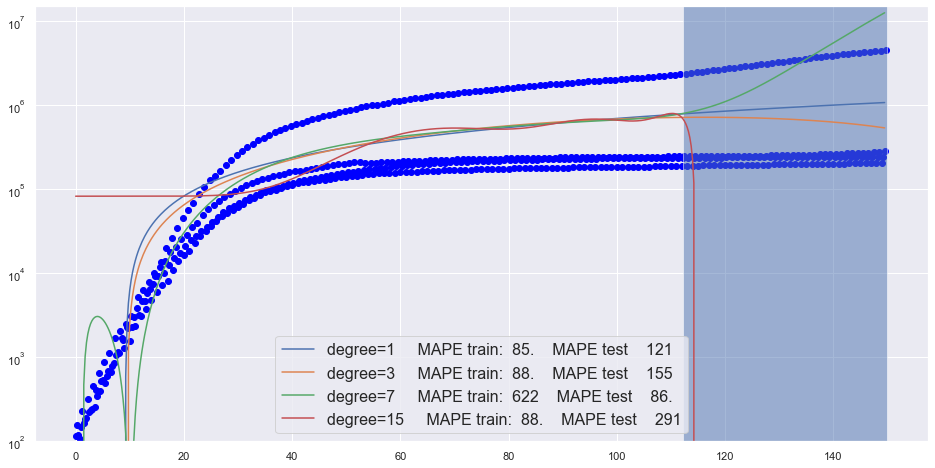

In [106]:
fig, ax1 = plt.subplots(1, 1)

ax1.scatter(np.arange(len(y))/4,y, color='blue')
ax1.axvspan((len(y)-test_points-1)/4, len(y)/4, facecolor='b', alpha=0.5)

for degree in [1,3,7,15]:
    y_hat_insaple=PolynomialRegression(degree).fit(X_train, y_train).predict(X_train)
    y_hat_test = PolynomialRegression(degree).fit(X_train, y_train).predict(X_test)



    X_plot=np.concatenate((X_train, X_test), axis=None)
    y_plot=np.concatenate((y_hat_insaple, y_hat_test), axis=None)

    ax1.plot(X_plot, y_plot, label='degree={0}'.format(degree)+ 
                 '     MAPE train:  ' + str(mean_absolute_percentage_error(y_hat_insaple, y_train))[0:3]
                 +'    MAPE test    ' +str(mean_absolute_percentage_error(y_hat_test, y_test))[0:3]) 

ax1.set_ylim(100, 15000000)
ax1.set_yscale('log')
ax1.legend(loc='best',
           prop={'size': 16});
